# Introduction

For this tutorial we'll be looking at a sample of dischage information containing de-identified patient information, hospital information, services rendered by the hospitals and billing information.    

We want to:

* Load the data using pandas 
* Clean the data so we can work with it
* Produce Histograms of the Total Charges
* See how we can "zoom in" on the data to identify areas of interest

#### Objectives

* Learn how to use the "apply" function to make changes to the data in a column
* Learn how to call matplotlib functions from panda objects
* Learn how to use pandas binary vectors to select subsets of data
* learn some basic uses of the groupby function to manipulate your data

To begin we import the libraries we'll be needing today,  including the pylab submodule (named 'plt' for short) and pandas (renamed 'pd' to make typing easier).  Additionally we include the `%matplotlib inline` statement to ensure our plots show up on the webpage. 

In [1]:
%matplotlib inline

from matplotlib import pylab as plt
import pandas as pd

Now we load the discharge information into our dataset by using panda's `read_csv()` function.  This will load all the information along with the header and provide us with a variable `df` that we can use to manipulate the data and generate our plots.

In [2]:
df = pd.read_csv("discharges.csv")

## Cleaning Data

Right now we're primarily interested in Total Charges,  but before we can start asking interesting questions about total charges and plotting its distribution we need to resolve a data cleanliness issue. Lets see what is in the 'Total Charges' column

In [3]:
df['Total Charges']

0        $62328.96
1        $30063.34
2        $14315.22
3        $32244.05
4        $28109.18
5        $21159.98
6         $8800.68
7        $71088.71
8        $18795.74
9         $5931.00
10       $29129.62
11       $41506.95
12       $42735.52
13       $12221.78
14       $12417.50
15       $18519.71
16       $25445.40
17       $37624.47
18       $26166.66
19       $54876.95
20       $49091.48
21       $31718.42
22      $137673.37
23       $17304.63
24       $26631.91
25       $14764.46
26       $31116.11
27       $44902.41
28       $48036.38
29       $17321.10
           ...    
9970     $11929.88
9971      $6929.94
9972      $2915.51
9973      $4327.66
9974      $6682.82
9975      $4439.98
9976     $10109.62
9977      $4576.64
9978      $1279.01
9979      $8947.41
9980      $6621.28
9981     $12446.00
9982      $7948.50
9983     $11899.75
9984     $16784.75
9985     $16147.25
9986      $4430.25
9987      $7625.00
9988     $27442.00
9989      $8311.00
9990      $6299.25
9991     $10

Total Charges contains dollar values for the services rendered to the patient while at the hospital. Unfortunately the data currently includes the dollar sign (\$). This leads to some difficult problems when trying to add, subtract or do any other kind of operation on these values.

As an example lets take the the __first__ value of Total Charges (`df['Total Charges'].iloc[0]`) and add it to the __second__ value of Total Charges (`df['Total Charges'].iloc[1]`). (`iloc` is a method, supported by panda objects, that can be used to index an axis by an integer.)

In [4]:
df['Total Charges'].iloc[0] + df['Total Charges'].iloc[1]

'$62328.96$30063.34'

This is certainly not what we want! But what is going on here? 

Instead of adding the _numbers_ 62328.96  and 30063.34 Python has gone ahead and appended the _strings_ \$62328.96 and \$30063.34.  If we want to do any kind of plotting or take any kind of summary statistics we're going to need to convert the strings contained in Total Charges to actual numbers.  

From a high level this means 
 1. removing the dollar sign (\$) from our string 
 2. converting the _type_ of the variable from a string to a number
 3. Doing this for every variable in the 'Total Charges' column.

To achieve this practically we're going to write a function that takes a string like \$62328.96 and converts it to a number 62328.96.  Then we're going to apply that function to each of the cells in the 'Total Charges' column. That is the purpose of functions, to take an input and return a transformed output. In this case our input is total charge as a string and our output will be total charge as a number. 

Lets take a look at some of the building blocks we'll need.

Replace is a function that we can use to return a new string which replaces certain characters with other characters. It takes two arguments,  the first is the string to look for,  the second is the string to replace with.  In this case we replace with the empty string. Lets see an example of this:  

In [5]:
"$62328.96".replace("$", "")

'62328.96'

This is a good start,  we've deleted the dollar sign (\$) by "replacing" it with the empty string.  Unfortunately this is not enough! our "number" is still considered a string,  if we try and add two replaced strings  we're still in the same situation:

In [6]:
"$62528.96".replace("$", "") + "$30063.34".replace("$", "")

'62528.9630063.34'

Here we've removed the dollar signs (\$) from each string and tried to add them together.  Python still sees these as two strings, and this can be an easy point to miss.  We need to tell python that these two 'strings' are actually numbers.  For numbers that have floating point decimals we do this with the `float()` function.

In [7]:
float('62528.96')

62528.96

Putting them both together

In [8]:
float('$62528.96'.replace("$", ""))

62528.96

##### Making it General
We get the number that we expect. This is all well and good,  but we'd like to be able to convert __any__ string with a dollar sign to a floating point number. To do this we need a function:

In [9]:
def translate_charge(string_charge):
    return float(string_charge.replace("$", ""))

Now we can pass any value to our function `translate_charge` and it will replace the dollar sign (\$) and return the number

In [10]:
translate_charge("$62528.96")

62528.96

We can even get the addition we were looking for before

In [11]:
translate_charge("$62528.96") + translate_charge("$30063.34")

92592.3

Now we just need to call this function on every value in 'Total Charges.' Luckily pandas has a very simple function that allows us to apply this function to each value. Not surprisingly it is called `apply`  

In [12]:
df['Total Charges'].apply(translate_charge)

0        62328.96
1        30063.34
2        14315.22
3        32244.05
4        28109.18
5        21159.98
6         8800.68
7        71088.71
8        18795.74
9         5931.00
10       29129.62
11       41506.95
12       42735.52
13       12221.78
14       12417.50
15       18519.71
16       25445.40
17       37624.47
18       26166.66
19       54876.95
20       49091.48
21       31718.42
22      137673.37
23       17304.63
24       26631.91
25       14764.46
26       31116.11
27       44902.41
28       48036.38
29       17321.10
          ...    
9970     11929.88
9971      6929.94
9972      2915.51
9973      4327.66
9974      6682.82
9975      4439.98
9976     10109.62
9977      4576.64
9978      1279.01
9979      8947.41
9980      6621.28
9981     12446.00
9982      7948.50
9983     11899.75
9984     16784.75
9985     16147.25
9986      4430.25
9987      7625.00
9988     27442.00
9989      8311.00
9990      6299.25
9991     10041.75
9992     15825.75
9993      8662.50
9994      

Careful though,  because `apply` will not change `df['Total Charges']` it will just return a new column. If you want to keep that column you have to set Total Charges equal to it.

In [13]:
df['Total Charges'] = df['Total Charges'].apply(translate_charge)

## Investigating the Data using histograms

Now that we have cleaned up Total Charges and have proper numbers for values,  we can start looking at some of the summary statistics for our sample. The quickest way to do this is to use the `describe()` function. This gives us the count, mean, the standard deviation and the min and max.

In [14]:
df['Total Charges'].describe()

count     10000.000000
mean      28917.608244
std       42960.967530
min           8.500000
25%        8322.365000
50%       16885.315000
75%       33265.787500
max      909834.270000
Name: Total Charges, dtype: float64

We can use the `hist` function to plot a histogram of our data to get a better sense of our distribution.  Note that panda data series support the `hist` method (among other plotting functions).  The method draws a histogram using matplotlib and using itself as the input data.  `hist` takes an argument `bins` to determine the number of bins we want to display.  Finally we can use the argument `figsize` to increase the size of the figure.

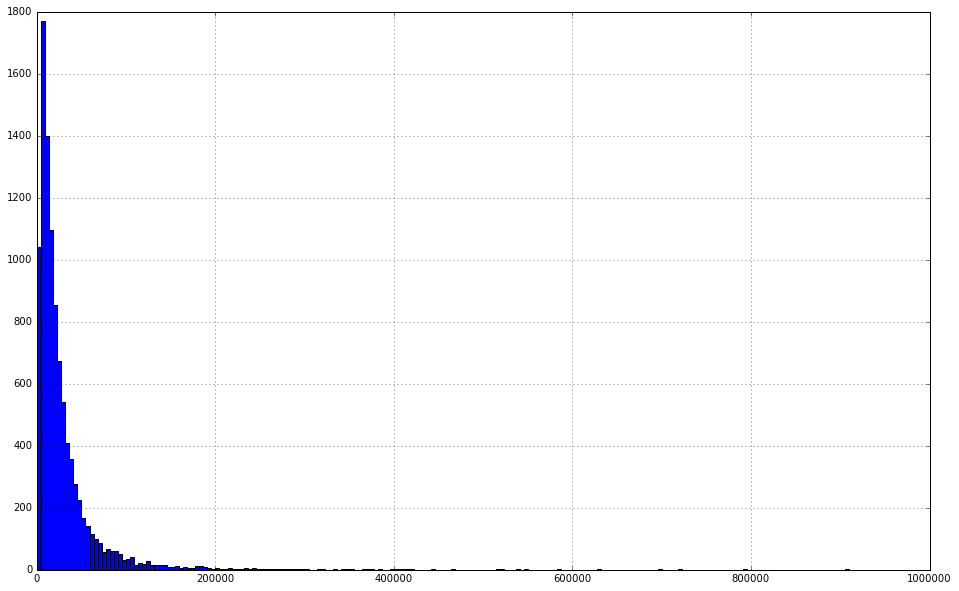

In [15]:
df['Total Charges'].hist(bins=200, figsize=(16.0, 10.0))

##### Zooming In
This looks like a distribution with a pretty long tail. This makes it hard to see exactly what is going on around the mean of the distribution. What we'd really like to be able to do is to "zoom in" and see the distribution without some of these outliers.

To do this we're going to use binary vectors to select subsets of the data we want. 

Binary vectors are just columns of data that contain either True or False.  We can generate these vectors by comparing columns to values.  For example:

In [16]:
df['Total Charges'] < 50000

0       False
1        True
2        True
3        True
4        True
5        True
6        True
7       False
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21       True
22      False
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
9970     True
9971     True
9972     True
9973     True
9974     True
9975     True
9976     True
9977     True
9978     True
9979     True
9980     True
9981     True
9982     True
9983     True
9984     True
9985     True
9986     True
9987     True
9988     True
9989     True
9990     True
9991     True
9992     True
9993     True
9994     True
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Total Charges, dtype: bool

This simple operation has compared each cell in Total Charges to the value 50,000.  If the value is less than 50,000 it gives a True,  otherwise it gives a False. Once we have this I can use this selector to grab only the values that are True (meet our condition)

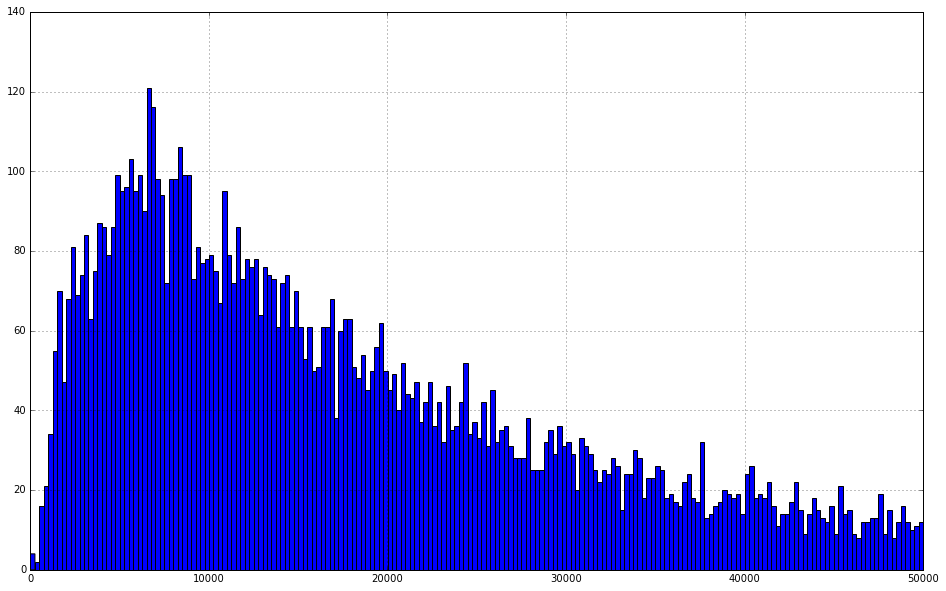

In [17]:
selector = df['Total Charges'] < 50000
df['Total Charges'][selector].hist(bins=200 ,figsize=(16., 10.))

## Investigating the Data using a Pie Chart

In this example we are going to plot the data using a pie chart.  First we want to take a look at the organization of our data.  We use pprint (which stands for "pretty print") to print the columns of the dataframe.

In [18]:
from pprint import pprint
pprint(list(df.columns))

['Unnamed: 0',
 'Hospital Service Area',
 'Hospital County',
 'Operating Certificate Number',
 'Facility Id',
 'Facility Name',
 'Age Group',
 'Zip Code - 3 digits',
 'Gender',
 'Race',
 'Ethnicity',
 'Length of Stay',
 'Admit Day of Week',
 'Type of Admission',
 'Patient Disposition',
 'Discharge Year',
 'Discharge Day of Week',
 'CCS Diagnosis Code',
 'CCS Diagnosis Description',
 'CCS Procedure Code',
 'CCS Procedure Description',
 'APR DRG Code',
 'APR DRG Description',
 'APR MDC Code',
 'APR MDC Description',
 'APR Severity of Illness Code',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Source of Payment 1',
 'Source of Payment 2',
 'Source of Payment 3',
 'Attending Provider License Number',
 'Operating Provider License Number',
 'Other Provider License Number',
 'Birth Weight',
 'Abortion Edit Indicator',
 'Emergency Department Indicator',
 'Total Charges']


Before creating the pie charts we want to learn how to organize the data using the `groupby` function.  `groupby` returns a `DataFrameGroupby` object which allows us to retrieve information about the groups (http://pandas.pydata.org/pandas-docs/stable/api.html#groupby).  As an example here we create groups by county.  We then use the `size` function to get a series containing the group names (it should be the county names) and the size of each group.  We print out the type of the objects and the objects themselves to verify. 

In [19]:
grouped=df.groupby(['Hospital County'])
pprint(type(grouped))
pprint(grouped)

series=grouped.size()

print(type(series))
print(series)
print
print ("Albany data")
Albany=series['Albany']
print(type(Albany))
print("Size of Albany data:"+str(Albany))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.series.Series'>
Hospital County
Albany          617
Allegheny        21
Broome          299
Cattaraugus      58
Cayuga           57
Chautatuqua     128
Chemung         168
Chenango         20
Clinton          99
Columbia         60
Cortland         49
Delaware         10
Dutchess        323
Erie           1112
Essex             5
Franklin         59
Fulton           35
Genesee          50
Herkimer          9
Jefferson       120
Lewis            19
Livingston       21
Madison          51
Monroe         1092
Montgomery       65
Nassau         1997
Niagara         211
Oneida          342
Onondaga        803
Ontario         121
Orange          398
Orleans          21
Oswego           61
Otsego          132
Putnam           70
Rensselaer      116
Rockland        357
Saratoga         87
Schenectady     233
Schoharie         5
Schuyler          9
St Lawrence     123
Steuben          19
Suffolk         348
dtype: int64

Albany 

We can also group by 2 categories.  Here we group by county and type of admission. Then we use `ix` (an indexing function) to retrieve the data for Albany county. 

In [20]:
grouped=df.groupby(['Hospital County', 'Type of Admission']).size()
pprint(type(grouped))

counts = grouped.ix['Albany']
print counts

<class 'pandas.core.series.Series'>
Type of Admission
Elective     163
Emergency    359
Newborn       44
Urgent        51
dtype: int64


Before we create our plot lets import the numpy library and the interact widget and also set the font type for our plot.

In [21]:
import numpy as np
from IPython.html.widgets import interact

plt.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

C:\Users\bnorthan\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Now we define a function that draws our plot.  We first group by county and type of admission.  Then we get the data for the county we are interested in.  Finaly we use matplotlib to create a pie chart.   

In [22]:
def by_county(county='Albany'):
    status_counts = df.groupby(['Hospital County', 'Type of Admission']).size().ix[county]

    cmap = plt.cm.summer
    colors = cmap(np.linspace(0., 1., len(status_counts)))

    fig, ax = plt.subplots(figsize=(10.0, 10.0))

    ax.pie(status_counts, autopct=lambda p: '{0:.1f}% ({1:})'. format(p, int(p * sum(status_counts) / 100)), 
               labels=status_counts.index, colors=colors)
    fig.suptitle("{}".format(county))
    plt.show()

At this point we've defined a function to draw a plot.  But have not actually created a plot.  We are going to use the `interact` function to create an interactive plot.  `interact` takes a function (in this case the `by_county` function we defined above, and a list of values as inputs.  It creates a widget (gui component) using the values of the list.  Each time we select a new value from the widget it will call our function thereby redrawing the plot using a different county. 

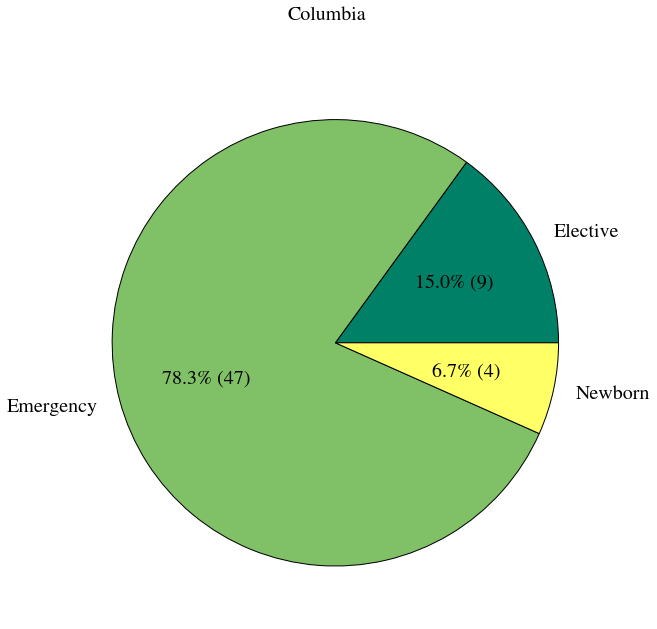

In [23]:
i = interact(by_county, county=list(df['Hospital County'].dropna().unique()))

In the below example we first take a look at the unique `Age Group` column.  Then we mmodify our function such that we plot a second pie chart containing only the `0 to 17` data.  An advanced excersise would be to add a second widget to the plot, such that one could select the age group of the second plot. 

In [24]:
df['Age Group'].unique()

array(['70 or Older', '30 to 49', '0 to 17', '50 to 69', '18 to 29'], dtype=object)

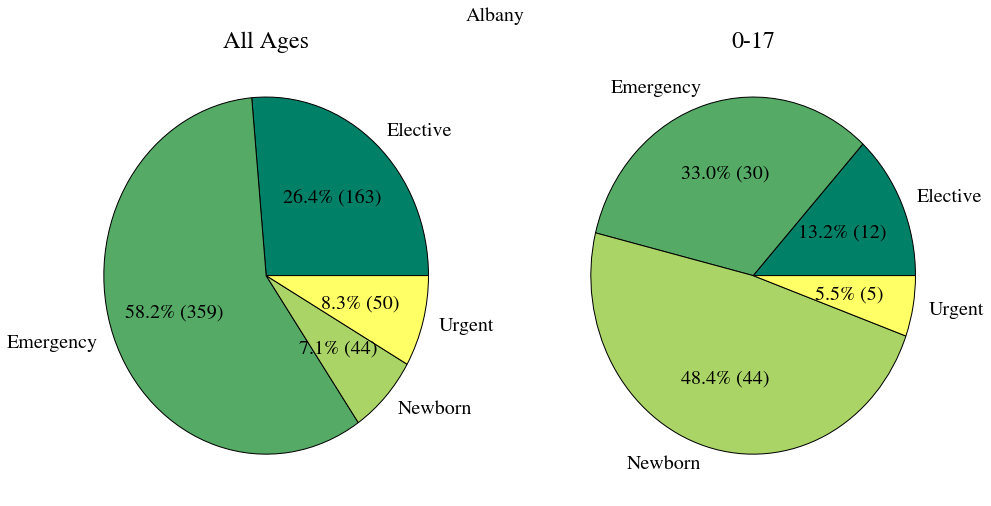

In [25]:
def by_county_with_0to17(county='Albany'):
    status_counts = df.groupby(['Hospital County', 'Type of Admission']).size().ix[county]
    status_counts_17 = df[df['Age Group'] == '0 to 17'].groupby(['Hospital County', 'Type of Admission']).size().ix[county]
        
    cmap = plt.cm.summer
    colors = cmap(np.linspace(0., 1., len(status_counts)))

    fig, axs = plt.subplots(1, 2, figsize=(16.0, 8.0))

    axs[0].pie(status_counts, autopct=lambda p: '{0:.1f}% ({1:})'. format(p, int(p * sum(status_counts) / 100)), 
               labels=status_counts.index, colors=colors)
    axs[0].set_title("All Ages")
    
    axs[1].pie(status_counts_17, autopct=lambda p: '{0:.1f}% ({1:})'. format(p, int(p * sum(status_counts_17) / 100)), 
               labels=status_counts_17.index, colors=colors)
    axs[1].set_title("0-17")
    
    
    fig.suptitle("{}".format(county))
    plt.show()

i = interact(by_county_with_0to17, county=list(df['Hospital County'].dropna().unique()))

We can start to see how powerful pandas and matplotlib can be.  In this example we use `groupby` to organize the data by `Admit Day of Week` then plot a bar graph (using only 1 line of code!). 

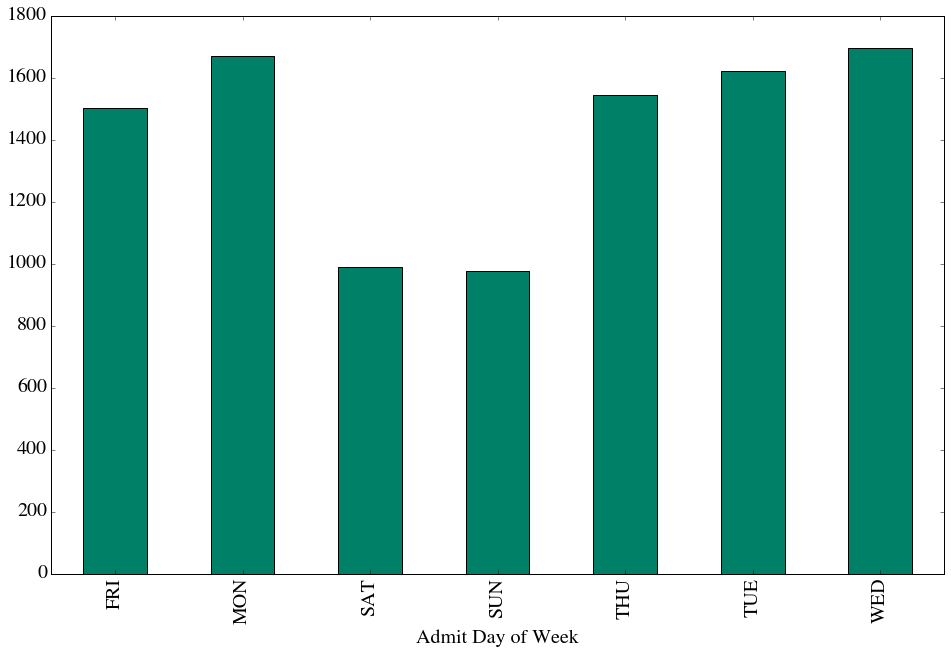

In [26]:
df.groupby('Admit Day of Week').size().plot(kind="bar", figsize=(16.0, 10.0), grid=False, colormap=plt.cm.summer)

And we can group by 2 columns to create a detailed bar plot of both `Admit Day of Week` and `Type of Admission`.

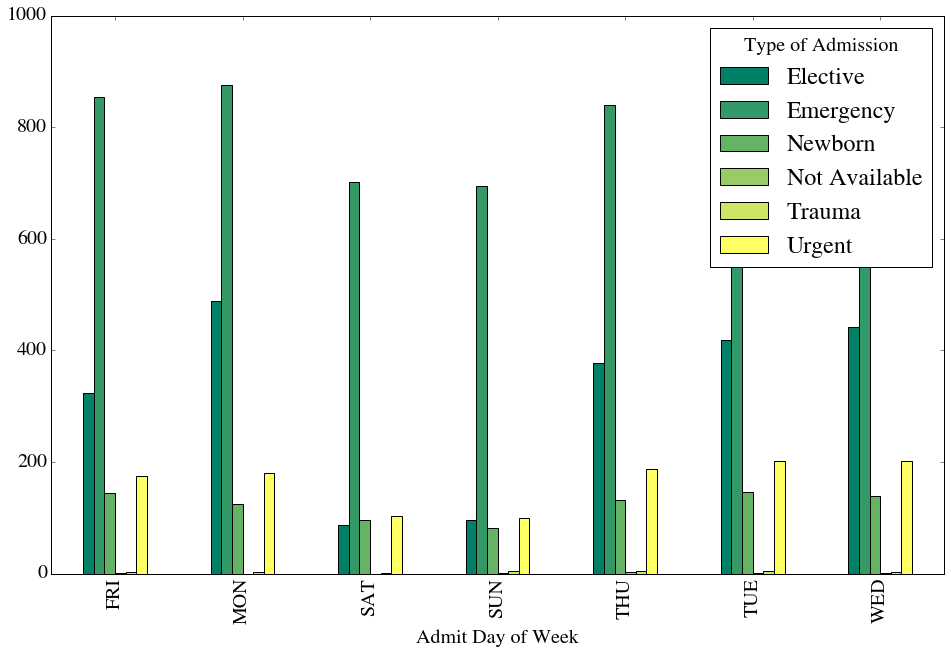

In [27]:
df.groupby(['Admit Day of Week', 'Type of Admission']).size().unstack('Type of Admission').plot(kind="bar", 
                                                                       figsize=(16.0, 10.0), 
                                                                       grid=False, 
                                                                       colormap=plt.cm.summer)